## Model Building

### Loading the data

In [1]:
# Import library
import pandas as pd
# Read the dataset
df_null_removed = pd.read_csv('data/kkbox_spotify_null_removed.csv',low_memory=False)
df_null_removed.head()

,track_id,track_name,artists,duration_ms,year,acousticness,danceability,energy,instrumentalness,liveness,...,source_screen_name,source_type,target,genre_ids,composer,city,age,gender,registration_init_time,expiration_date
0,617KSbx52ACbnQBxSsG26X,Beautiful,Mariah Carey| Miguel,199867,2014,0.346,0.677,0.749,0.0,0.347,...,Artist more,top-hits-for-artist,0,465,Mariah Carey| Brook Davis| Miguel Pimentel| Na...,9,33,male,20140729,20170930
1,617KSbx52ACbnQBxSsG26X,Beautiful,Mariah Carey| Miguel,199867,2014,0.346,0.677,0.749,0.0,0.347,...,Local playlist more,local-playlist,1,465,Mariah Carey| Brook Davis| Miguel Pimentel| Na...,22,32,female,20060303,20180819
2,617KSbx52ACbnQBxSsG26X,Beautiful,Mariah Carey| Miguel,199867,2014,0.346,0.677,0.749,0.0,0.347,...,Local playlist more,local-library,0,465,Miguel Pimentel|Mariah Carey|Nathan Perez|Broo...,13,24,male,20130903,20171002
3,617KSbx52ACbnQBxSsG26X,Beautiful,Mariah Carey| Miguel,199867,2014,0.346,0.677,0.749,0.0,0.347,...,Local playlist more,local-library,0,465,Mariah Carey| Brook Davis| Miguel Pimentel| Na...,5,31,male,20150705,20180111
4,617KSbx52ACbnQBxSsG26X,Beautiful,Mariah Carey| Miguel,199867,2014,0.346,0.677,0.749,0.0,0.347,...,Local playlist more,local-library,0,465,Mariah Carey| Brook Davis| Miguel Pimentel| Na...,13,27,female,20120109,20170919


In [2]:
df_null_removed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1298432 entries, 0 to 1298431
Data columns (total 30 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   track_id                1298432 non-null  object 
 1   track_name              1298432 non-null  object 
 2   artists                 1298432 non-null  object 
 3   duration_ms             1298432 non-null  int64  
 4   year                    1298432 non-null  int64  
 5   acousticness            1298432 non-null  float64
 6   danceability            1298432 non-null  float64
 7   energy                  1298432 non-null  float64
 8   instrumentalness        1298432 non-null  float64
 9   liveness                1298432 non-null  float64
 10  loudness                1298432 non-null  float64
 11  speechiness             1298432 non-null  float64
 12  tempo                   1298432 non-null  float64
 13  valence                 1298432 non-null  float64
 14  mo

### Label encoding for object datatypes

In [3]:
# List of columns to be encoded
column = ['user_id','track_id','track_name','source_system_tab','source_screen_name','source_type','gender',
          'artists', 'composer','genre_ids']

# Import the LabelEncoder from scikit-learn's preprocessing module
from sklearn import preprocessing
# Create a LabelEncoder instance
label_encoder = preprocessing.LabelEncoder()

# Define a function for label encoding that loops through each column in the list
def label_encoding(data):
    for col in column:
        print(col) # Print the name of the current column
        # Use the LabelEncoder to transform the column's values to numerical labels
        data[col]= label_encoder.fit_transform(data[col])
        
    return data # Return the data with label-encoded columns
# Call the label_encoding function on the DataFrame 'df_null_removed'    
label_encoding(df_null_removed)

user_id
track_id
track_name
source_system_tab
source_screen_name
source_type
gender
artists
composer
genre_ids


,track_id,track_name,artists,duration_ms,year,acousticness,danceability,energy,instrumentalness,liveness,...,source_screen_name,source_type,target,genre_ids,composer,city,age,gender,registration_init_time,expiration_date
0,7480,541,2283,199867,2014,0.346,0.677,0.749,0.0,0.347,...,1,10,0,130,8259,9,33,1,20140729,20170930
1,7480,541,2283,199867,2014,0.346,0.677,0.749,0.0,0.347,...,7,4,1,130,8259,22,32,0,20060303,20180819
2,7480,541,2283,199867,2014,0.346,0.677,0.749,0.0,0.347,...,7,3,0,130,8886,13,24,1,20130903,20171002
3,7480,541,2283,199867,2014,0.346,0.677,0.749,0.0,0.347,...,7,3,0,130,8259,5,31,1,20150705,20180111
4,7480,541,2283,199867,2014,0.346,0.677,0.749,0.0,0.347,...,7,3,0,130,8259,13,27,0,20120109,20170919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298427,5478,6870,1599,249573,2005,0.737,0.733,0.480,0.0,0.150,...,7,3,0,127,13041,22,37,1,20110522,20170918
1298428,5478,6870,1599,249573,2005,0.737,0.733,0.480,0.0,0.150,...,14,8,1,127,13041,13,26,0,20080413,20171002
1298429,5478,6870,1599,249573,2005,0.737,0.733,0.480,0.0,0.150,...,7,3,0,127,13041,5,23,0,20170106,20171004
1298430,5478,6870,1599,249573,2005,0.737,0.733,0.480,0.0,0.150,...,7,4,1,127,13041,15,23,0,20070725,20171013


### Train Test Split

In [4]:
# import the train_test_split library
from sklearn.model_selection import train_test_split

# define the input and output variables 
x,y = df_null_removed.drop('target', axis=1),df_null_removed['target']
# split the data into training and testing sets
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state=1)

### Model Implementation

In [5]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, accuracy_score

In [6]:
# Create DMatrix for the training and testing data
dtrain = xgb.DMatrix(x_train, label=y_train, enable_categorical= True)
dtest = xgb.DMatrix(x_test, label=y_test, enable_categorical= True)

# Define the parameters for the XGBoost Model
params ={'learning_rate':0.1,'max_depth':12,'min_child_weight':5,
         'subsample':0.8,'objective':'binary:logistic',
        'eval_metric':'logloss'}

# Number of boosting rounds (iterations)
num_round=300

# Train an XGBoost model
model = xgb.train(params, dtrain, num_round)

# Make predictions on the testing data
y_pred = model.predict(dtest)

print("Predicted Labels:", y_pred)

auc = roc_auc_score(y_test,y_pred)
print("AUC Score:", auc)

# Convert predicted probabilities to binary labels using a threshold of 0.5
y_pred = [1 if prob>0.5 else 0 for prob in y_pred]

# Calculate the accuracy of the model's predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Predicted Labels: [0.9040706  0.13658544 0.39108944 ... 0.5333055  0.85151464 0.8261547 ]
AUC Score: 0.8601236291242416
Accuracy: 0.7783049093059937


### Feature Importance Plot

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

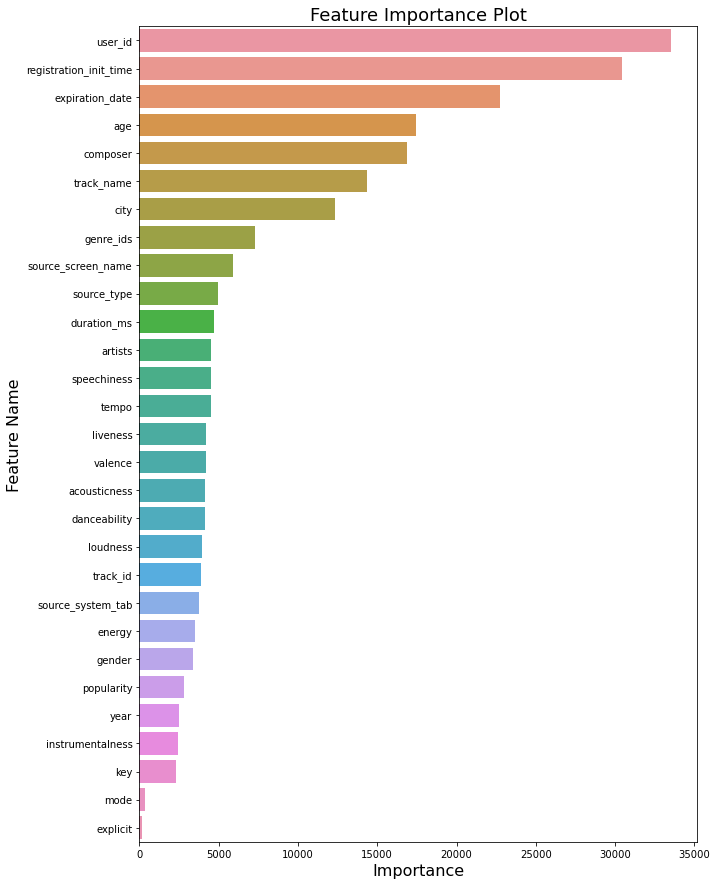

In [8]:
importances = model.get_score()
imp_df = pd.DataFrame(list(importances.items()), columns=['Feature Name', 'Importance'])
fi = imp_df.sort_values(by= 'Importance', ascending=False)
plt.figure(figsize=(10,15))
sns.barplot(data=fi, x='Importance', y='Feature Name')
plt.title('Feature Importance Plot', fontsize=18)
plt. xlabel('Importance',fontsize=16)
plt.ylabel('Feature Name', fontsize=16)
plt.show()

### Model Explainer Plot

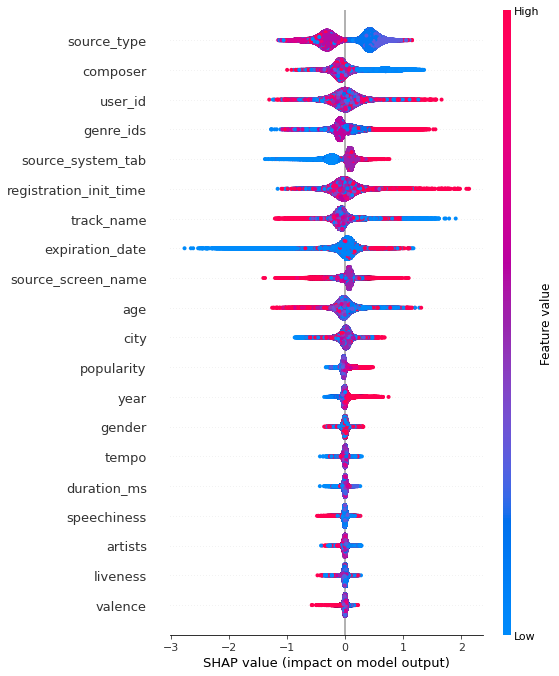

In [10]:
import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_test)
shap.summary_plot(shap_values, x_test)